In [1]:
from signal_utils import *

# Real Signal

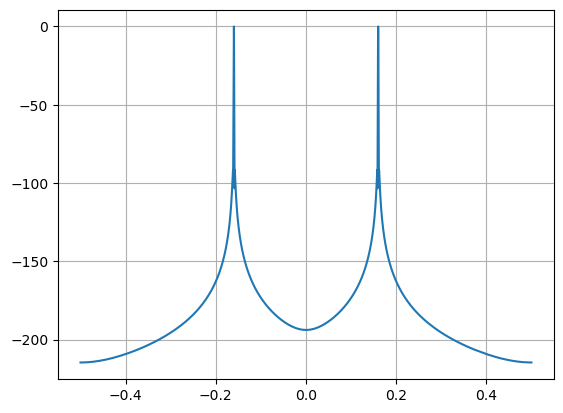

In [35]:
N = 2**12
n = np.arange(N)
F = 0.16
x_test = 1.0 * np.sin(2*np.pi*F*n)

np.savetxt("../../../../VHDL/data/interpolation_test/xin_test.txt", x_test, fmt="%.6f")

freqs_test, xfftdB_test, an_ = fftdB(x_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

In [30]:
n_frac = 11

FIR0 = np.array([1.42913225e-05, -1.25469998e-07, -3.95164214e-05,  2.00697358e-07,
        9.10726421e-05, -5.03720706e-07, -1.83517720e-04,  8.28311364e-07,
        3.37020847e-04, -1.45883566e-06, -5.78304995e-04,  2.19153555e-06,
        9.40386412e-04, -3.30630520e-06, -1.46432342e-03,  4.59161987e-06,
        2.19919995e-03, -6.30772317e-06, -3.20461151e-03,  8.19780208e-06,
        4.55242030e-03, -1.04842771e-05, -6.33284126e-03,  1.28781958e-05,
        8.66331313e-03, -1.55512021e-05, -1.17086059e-02,  1.81842202e-05,
        1.57184958e-02, -2.08973517e-05, -2.11115317e-02,  2.33480901e-05,
        2.86693917e-02, -2.56599902e-05, -4.00697440e-02,  2.74838396e-05,
        5.96948150e-02, -2.89563716e-05, -1.03678482e-01,  2.97825256e-05,
        3.17492818e-01,  4.99967636e-01,  3.17492818e-01,  2.97825256e-05,
       -1.03678482e-01, -2.89563716e-05,  5.96948150e-02,  2.74838396e-05,
       -4.00697440e-02, -2.56599902e-05,  2.86693917e-02,  2.33480901e-05,
       -2.11115317e-02, -2.08973517e-05,  1.57184958e-02,  1.81842202e-05,
       -1.17086059e-02, -1.55512021e-05,  8.66331313e-03,  1.28781958e-05,
       -6.33284126e-03, -1.04842771e-05,  4.55242030e-03,  8.19780208e-06,
       -3.20461151e-03, -6.30772317e-06,  2.19919995e-03,  4.59161987e-06,
       -1.46432342e-03, -3.30630520e-06,  9.40386412e-04,  2.19153555e-06,
       -5.78304995e-04, -1.45883566e-06,  3.37020847e-04,  8.28311364e-07,
       -1.83517720e-04, -5.03720706e-07,  9.10726421e-05,  2.00697358e-07,
       -3.95164214e-05, -1.25469998e-07,  1.42913225e-05])
FIR1 = np.array([7.45880558e-04,  4.20362887e-14, -5.65415293e-03, -4.07624618e-14,
        2.34193754e-02,  3.26520408e-14, -7.49445558e-02, -2.14447011e-14,
        3.06435005e-01,  4.99996896e-01,  3.06435005e-01, -2.14447011e-14,
       -7.49445558e-02,  3.26520408e-14,  2.34193754e-02, -4.07624618e-14,
       -5.65415293e-03,  4.20362887e-14,  7.45880558e-04])
FIR2 = np.array([6.73047457e-03,  1.80845557e-05, -5.12997224e-02, -6.24390614e-05,
        2.94570558e-01,  5.00086089e-01,  2.94570558e-01, -6.24390614e-05,
       -5.12997224e-02,  1.80845557e-05,  6.73047457e-03])


def split_and_filter(arr):
    even = arr[::2]
    odd = arr[1::2]
    return even[even != 0], odd[odd != 0]
    
FIR0 = np.array(float_to_q1n(FIR0/np.max(FIR0), n_frac))/2**11
FIR1 = np.array(float_to_q1n(FIR1/np.max(FIR2), n_frac))/2**11
FIR2 = np.array(float_to_q1n(FIR2/np.max(FIR2), n_frac))/2**11


FIR0_even, FIR0_odd = split_and_filter(FIR0)
FIR1_even, FIR1_odd = split_and_filter(FIR1)
FIR2_even, FIR2_odd = split_and_filter(FIR2)

np.savetxt("../../../../VHDL/data/interpolation_test/fir0_phase0.txt", FIR0_even, fmt="%.6f")
np.savetxt("../../../../VHDL/data/interpolation_test/fir0_phase1.txt", FIR0_odd, fmt="%.6f")

np.savetxt("../../../../VHDL/data/interpolation_test/fir1_phase0.txt", FIR1_even, fmt="%.6f")
np.savetxt("../../../../VHDL/data/interpolation_test/fir1_phase1.txt", FIR1_odd, fmt="%.6f")

np.savetxt("../../../../VHDL/data/interpolation_test/fir2_phase0.txt", FIR2_even, fmt="%.6f")
np.savetxt("../../../../VHDL/data/interpolation_test/fir2_phase1.txt", FIR2_odd, fmt="%.6f")

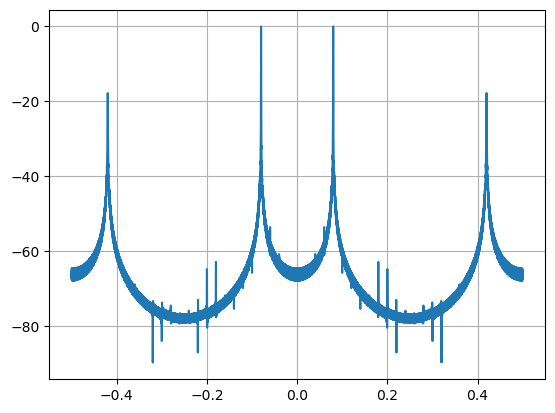

In [38]:
xout_test = np.loadtxt("../../../../VHDL/data/interpolation_test/xout_test.txt", dtype=np.int32)

freq_test, xfftdB_test, an = fftdB(xout_test, True)
plt.figure()
plt.plot(freq_test, xfftdB_test)
plt.grid()